In [175]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Duration = 2 days in September 2013

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
from matplotlib import dates as mpl_dates
from sklearn.preprocessing import LabelEncoder

In [177]:
time_col='Time'
col_dict={date_col:time_col}

In [178]:
import sys

ROOT_PATH = '../..'
sys.path.append(ROOT_PATH)

In [179]:
df = pd.read_csv("creditcard.csv")
df=df.rename(columns=col_dict)
df=df.set_index(time_col,drop=True)

In [37]:
df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [40]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [42]:
anomalies.shape

(492, 30)

In [43]:
no_anomalies.shape

(284315, 30)

In [44]:
print("number of samples :", df.shape[0])
print("duration : 2 days in September 2013")
print("number of anomalies : ", anomalies.shape[0])

number of samples : 284807
duration : 2 days in September 2013
number of anomalies :  492


In [46]:
credit_card=df.drop(['Class'],axis=1)


In [54]:
le = LabelEncoder()
df['Class']= le.fit_transform(df['Class'])


In [58]:
anomalies = df[df["Class"]==1]
no_anomalies = df[df["Class"]==0]

# Plotting the Anamolies in all dimensions

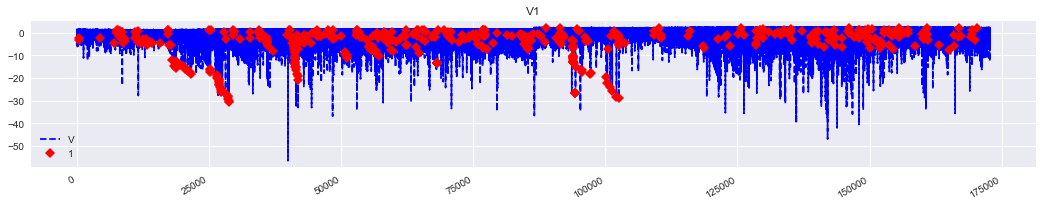

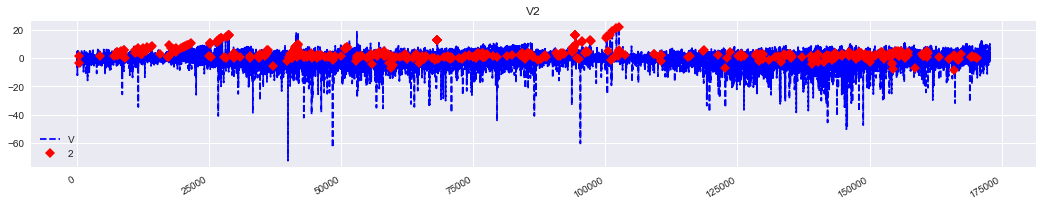

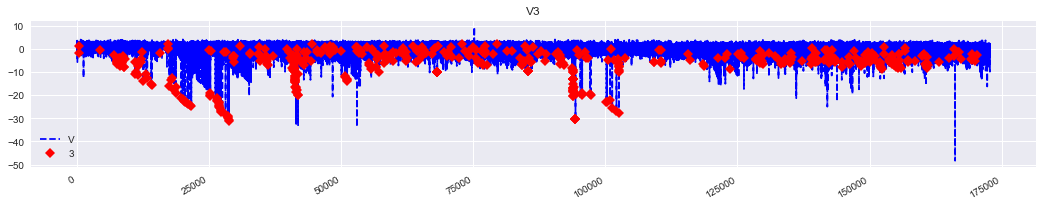

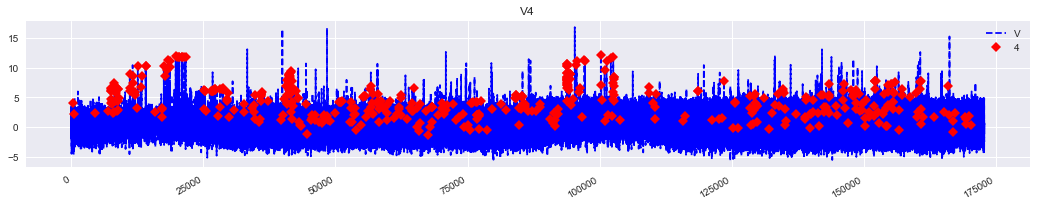

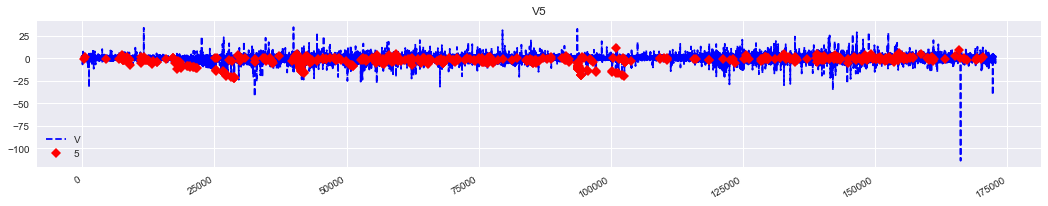

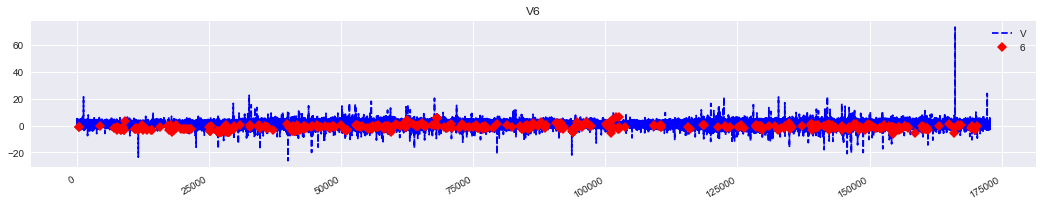

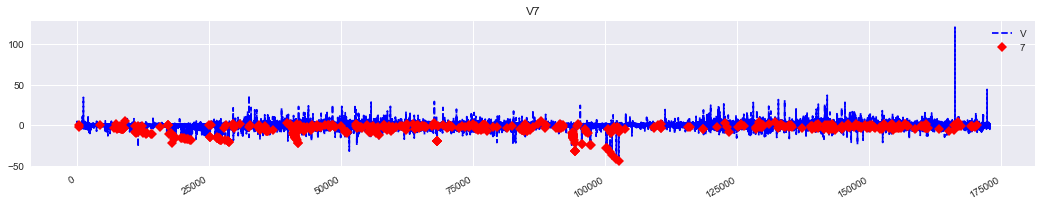

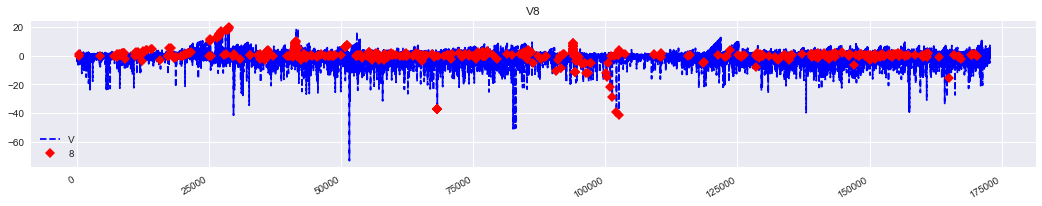

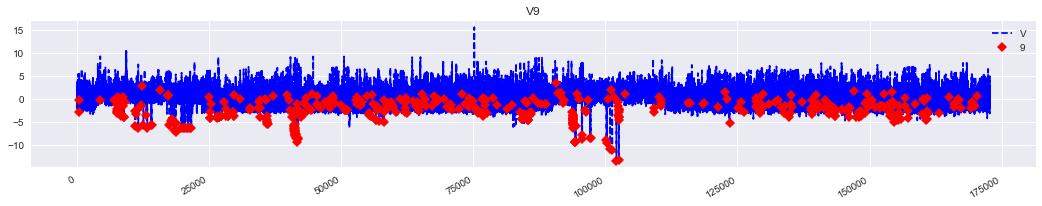

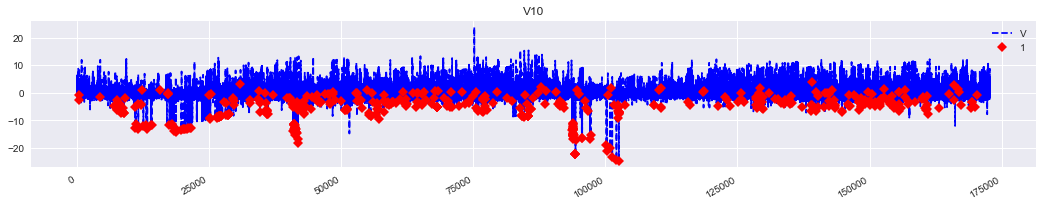

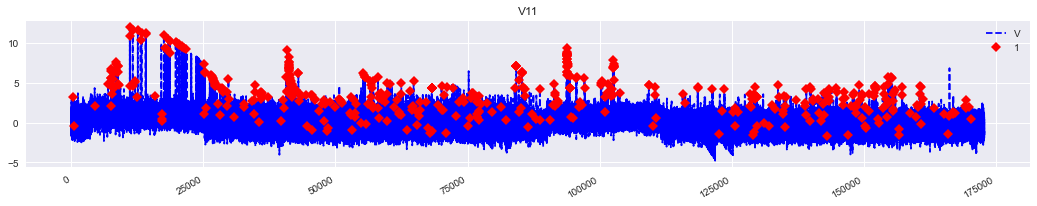

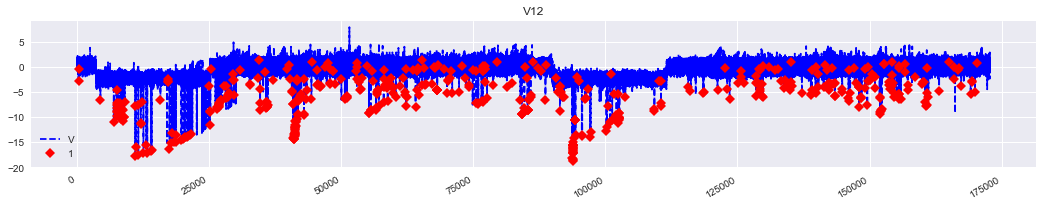

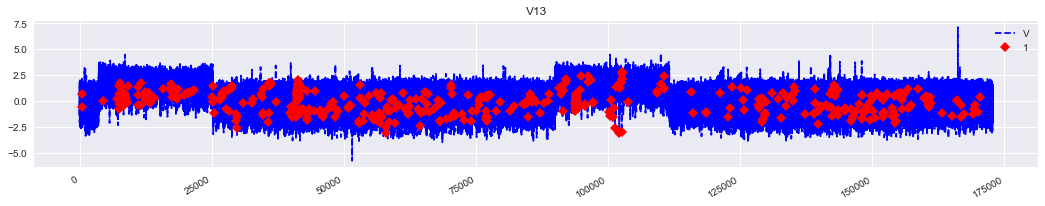

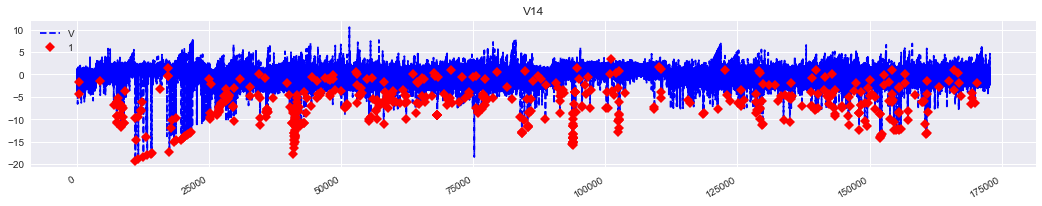

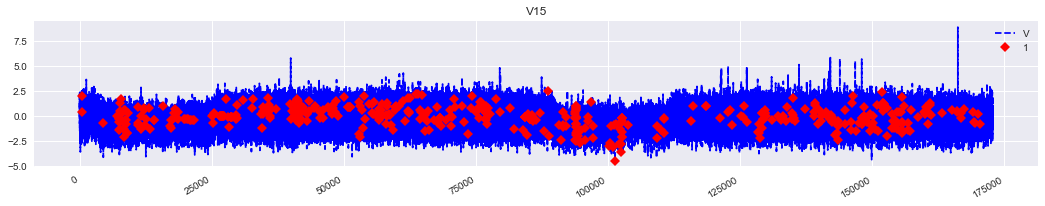

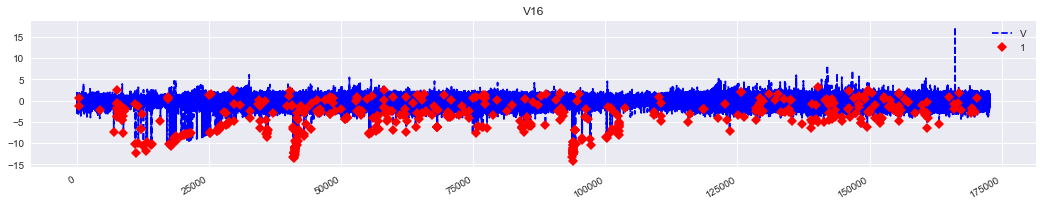

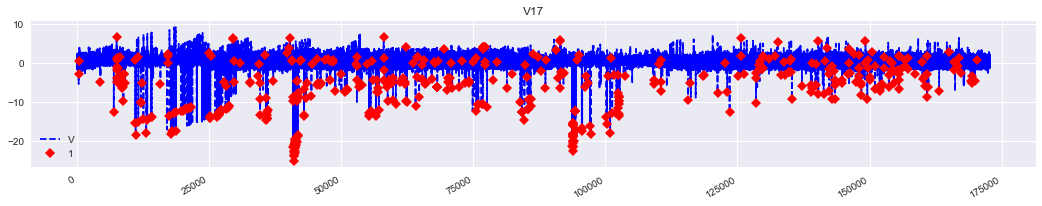

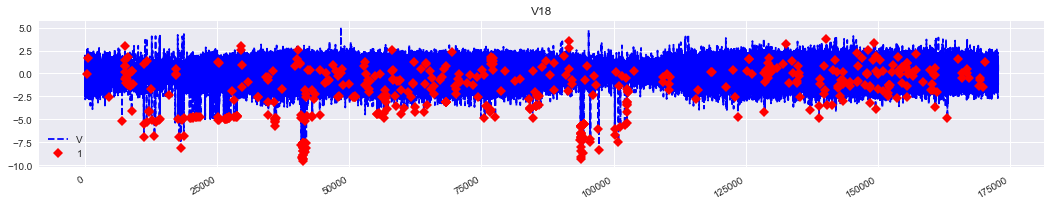

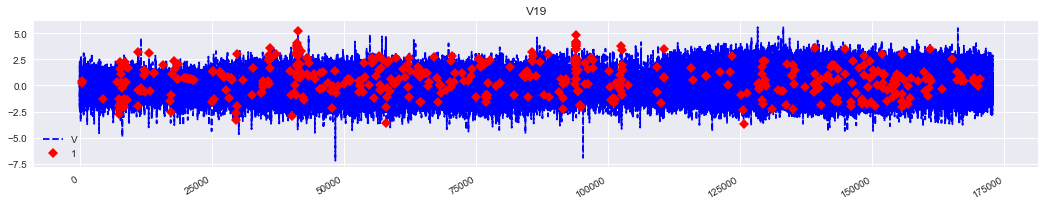

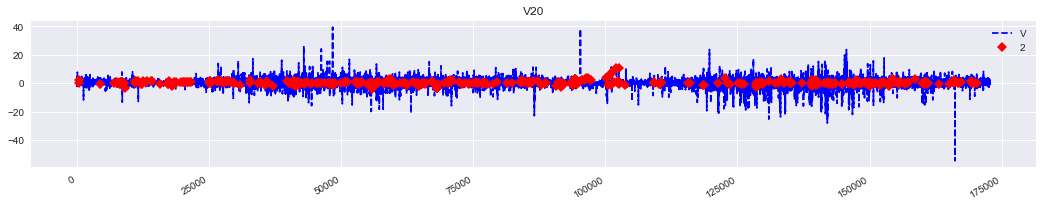

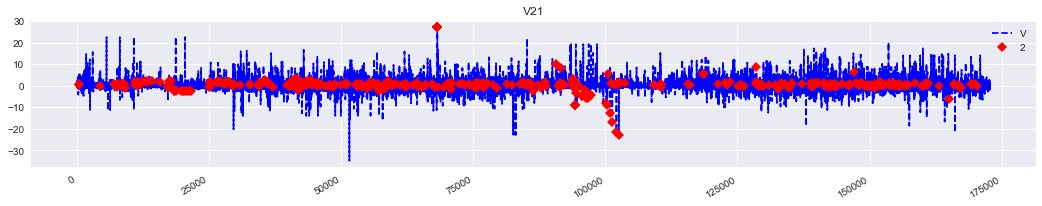

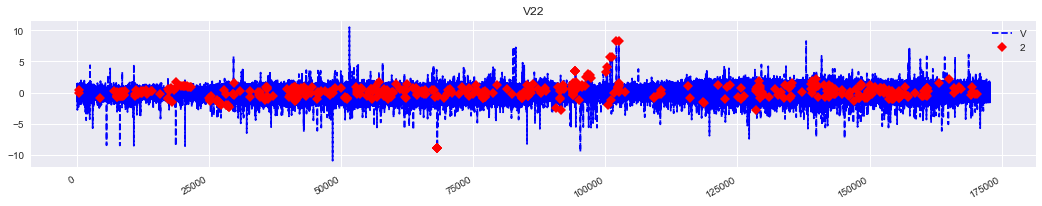

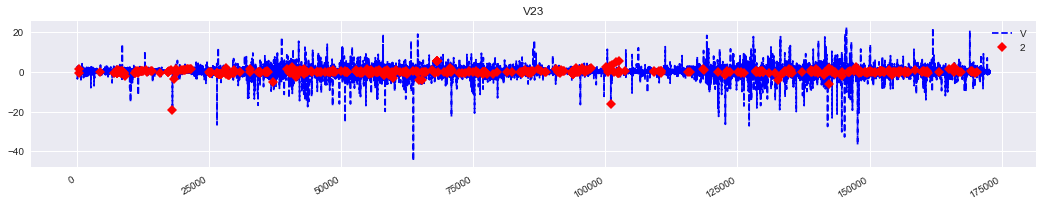

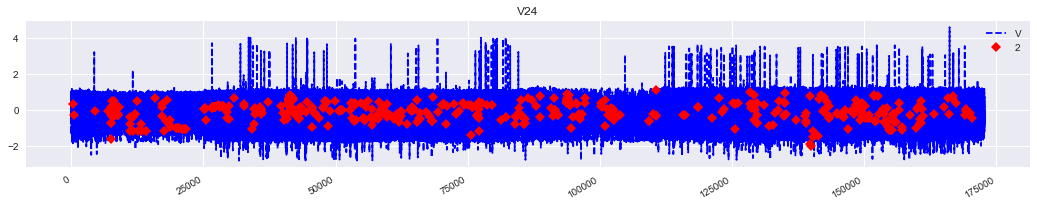

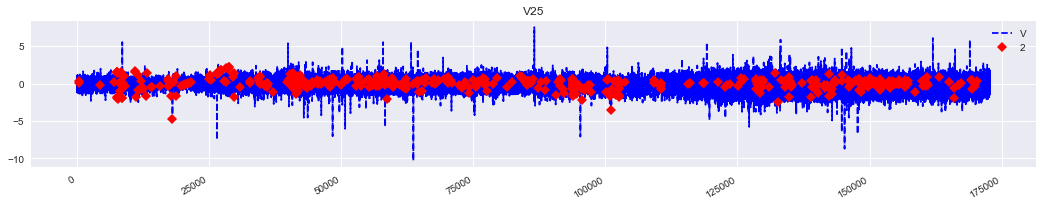

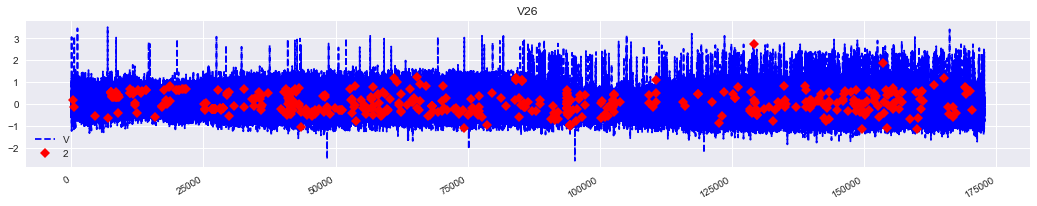

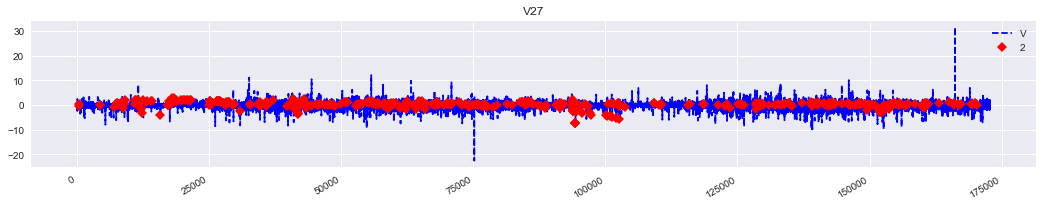

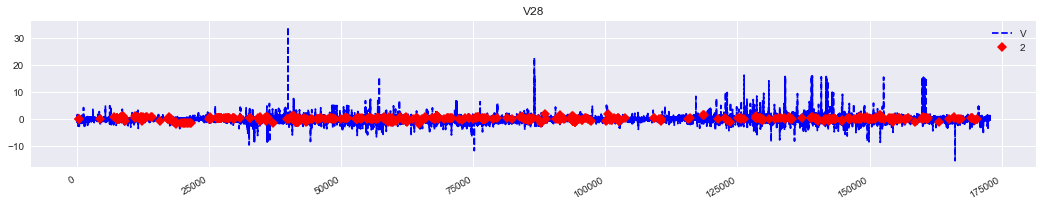

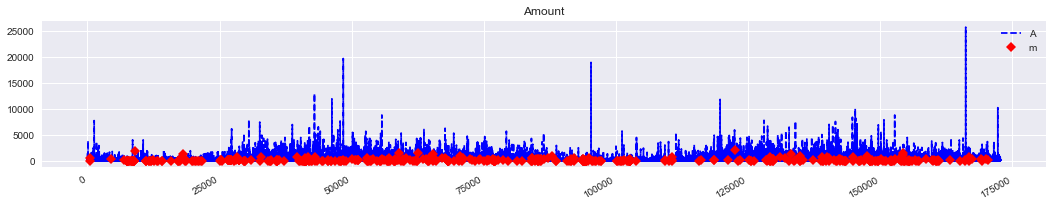

In [62]:
df_creditcard=df.drop(['Class'],axis=1)
columns=df_creditcard.columns
for col in columns:
    plt.style.use('seaborn')
    plt.figure(figsize=(18,3))
    plt.plot(df_creditcard[col], color='blue',linestyle='--', zorder=1)
    plt.plot(anomalies[col], linestyle='none', marker='D', color='red')
    plt.gcf().autofmt_xdate()
    plt.title(col)
    plt.legend(col)
    plt.show()


# Cutting Technique

### We are fixing a threshold to find anamolies

In [96]:
def count_anomaly(df):
    anomalies = df[df["Class"]==1]
    no_anomalies = df[df["Class"]==0]
    return anomalies.shape[0], no_anomalies.shape[0]

def cutting(df, column_name, value):
    d1 = df[df[column_name] >= value]
    d2 = df[df[column_name] < value]
    a1, n1 = count_anomaly(d1)
    a2, n2 = count_anomaly(d2)
    return a1, n1, a2, n2

In [101]:
cutting(df,"V9", -7)

(78, 105688, 30, 0)

In [104]:
cutting(df,"V16", -11)

(32, 101294, 36, 0)

In [139]:
cutting(df,"V17", -17.1)

(21, 140274, 51, 0)

### We found 68 Anamolies by fixing a Threshold

In [186]:
# making boolean series for a team name
filter1 = df["V9"] < -7
filter2 = df["V16"] < -11
filter3 = df["V17"] < -17.1
  

# filtering data on basis of both filters
mask = (df.V9 < -7 ) |  ( df.V16 < -11) |  (df.V17 < -17.1)
anom=df[mask]
anom

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
11131.0,-1.426623,4.141986,-9.804103,6.666273,-4.749527,-2.073129,-10.089931,2.791345,-3.249516,-11.420451,...,1.865679,0.407809,0.605809,-0.769348,-1.746337,0.502040,1.977258,0.711607,1.00,1
13126.0,-2.880042,5.225442,-11.063330,6.689951,-5.759924,-2.244031,-11.199975,4.014722,-3.429304,-11.561950,...,2.002883,0.351102,0.795255,-0.778379,-1.646815,0.487539,1.427713,0.583172,1.00,1
17838.0,-5.187878,6.967709,-13.510931,8.617895,-11.214422,0.672248,-9.462533,5.328704,-4.897006,-11.786812,...,2.086083,0.760190,0.716806,-0.646743,-1.617043,0.172347,0.626647,-0.169726,766.36,1
18088.0,-12.224021,3.854150,-12.466766,9.648311,-2.726961,-4.445610,-21.922811,0.320792,-4.433162,-11.201400,...,-1.159830,-1.504119,-19.254328,0.544867,-4.781606,-0.007772,3.052358,-0.775036,1218.89,1
18675.0,-12.339603,4.488267,-16.587073,10.107274,-10.420199,0.130670,-15.600323,-1.157696,-5.304631,-12.938929,...,-2.089610,1.745315,1.376816,-0.554271,-1.610741,0.153725,1.212477,-1.869290,188.78,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100298.0,-22.341889,15.536133,-22.865228,7.043374,-14.183129,-0.463145,-28.215112,-14.607791,-9.481456,-20.949192,...,-9.110423,4.158895,1.412928,0.382801,0.447154,-0.632816,-4.380154,-0.467863,1.00,1
100924.0,-23.984747,16.697832,-22.209875,9.584969,-16.230439,2.596333,-33.239328,-21.560039,-10.842526,-19.836149,...,-12.615023,5.774087,2.750221,0.513411,-1.608804,-0.459624,-4.626127,-0.334561,1.00,1
101313.0,-25.825982,19.167239,-25.390229,11.125435,-16.682644,3.933699,-37.060311,-28.759799,-11.126624,-23.228255,...,-16.922016,5.703684,3.510019,0.054330,-0.671983,-0.209431,-4.950022,-0.448413,2.28,1


# Plotting the Anamolies based on Threshold

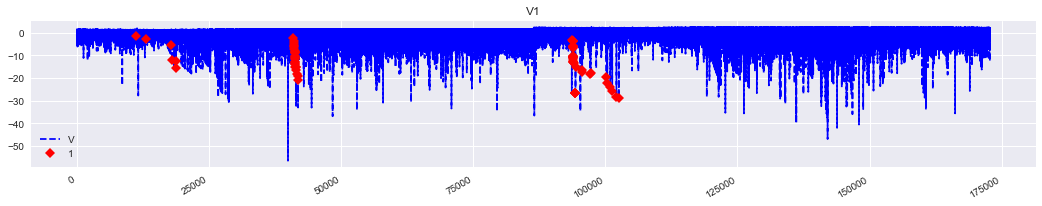

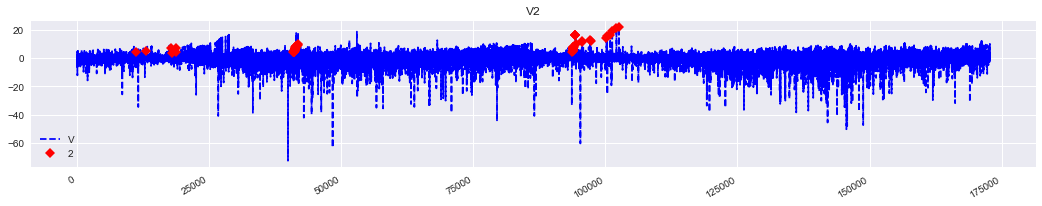

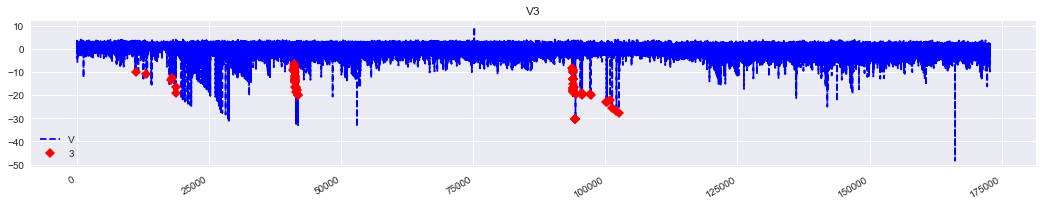

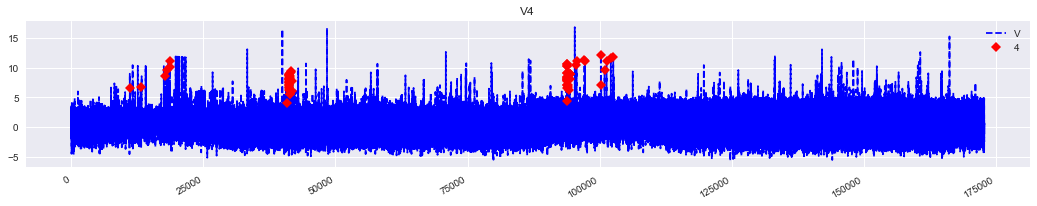

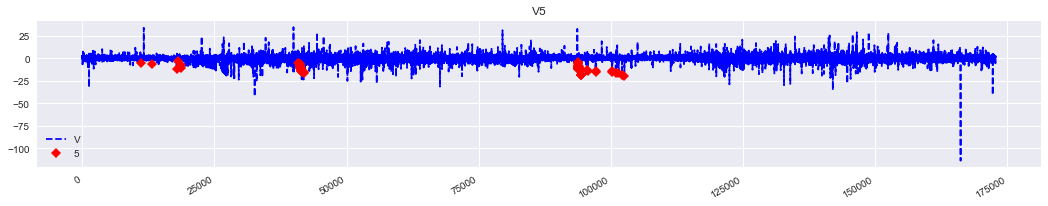

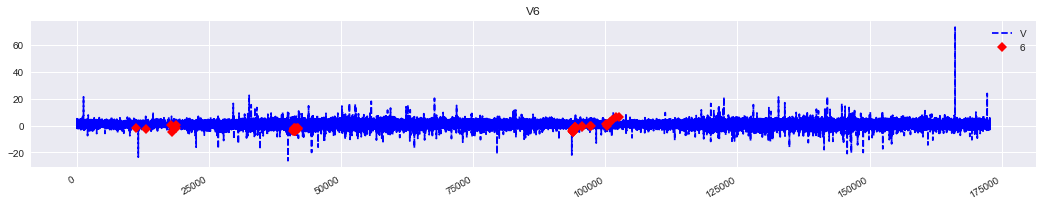

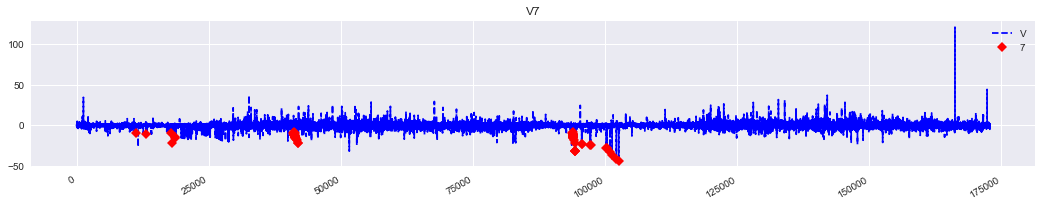

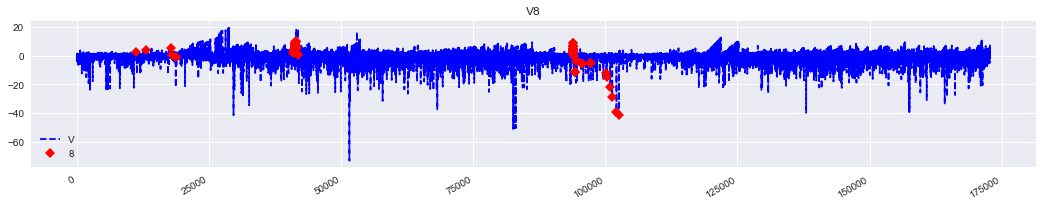

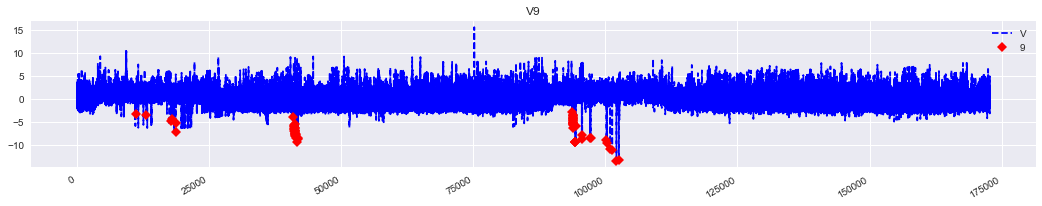

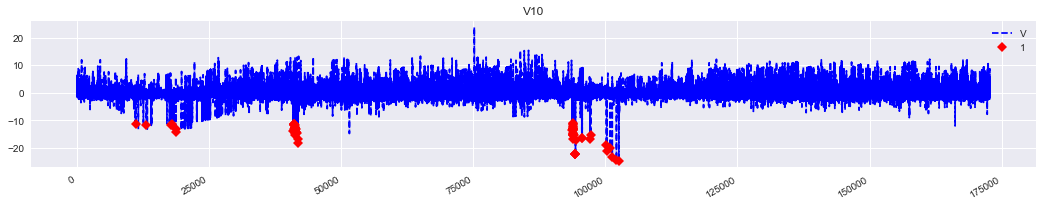

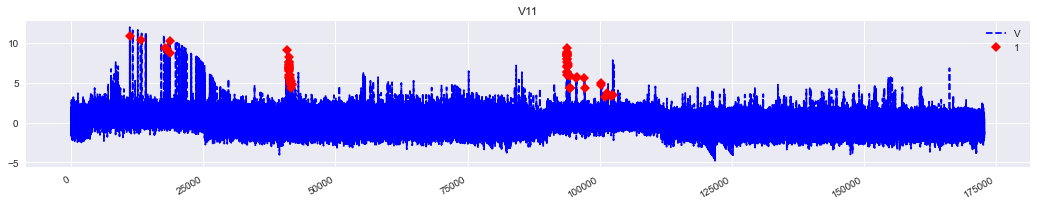

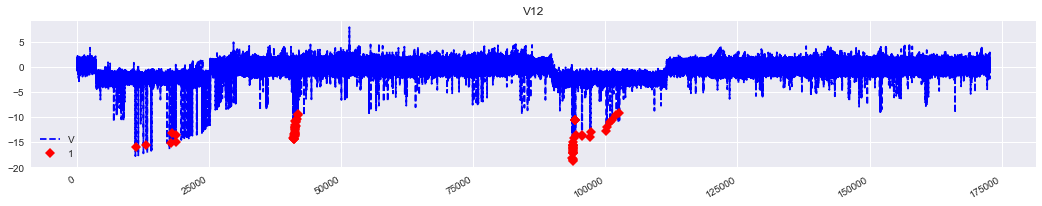

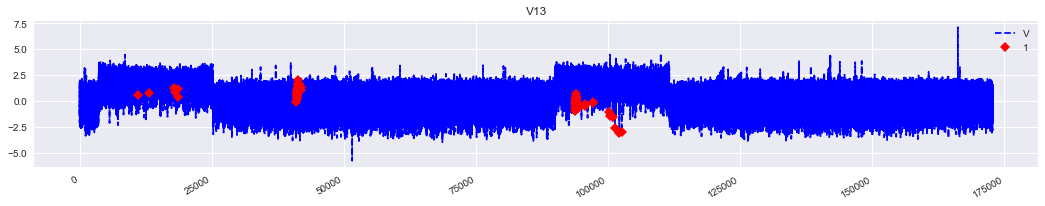

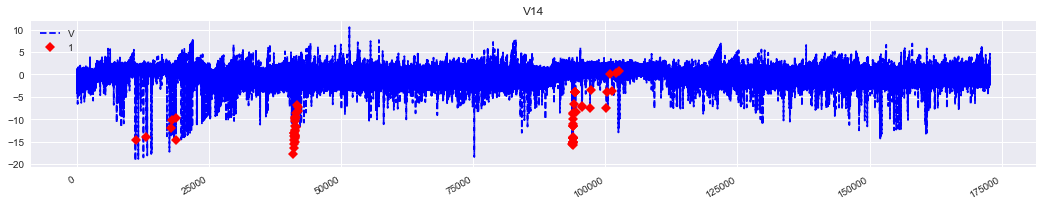

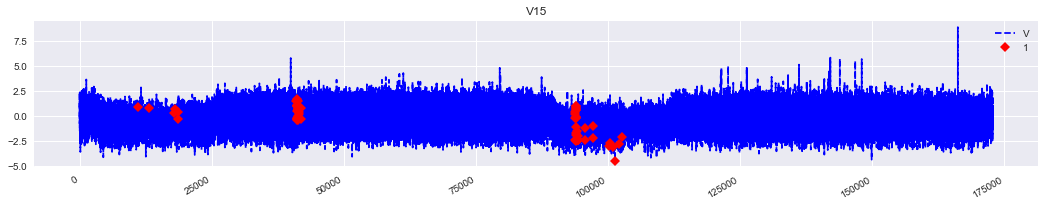

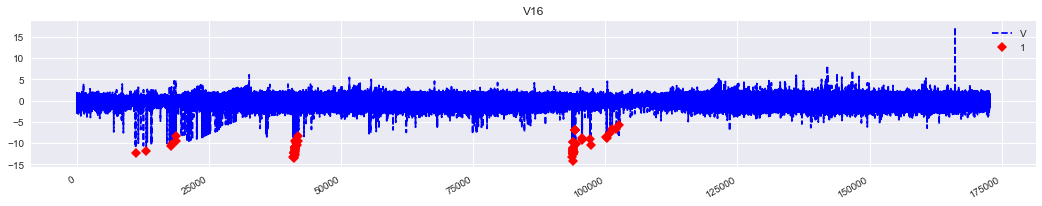

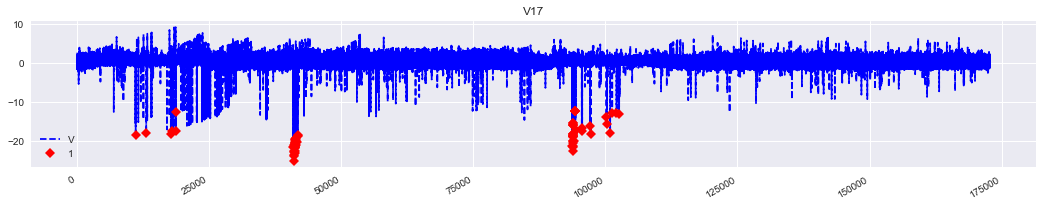

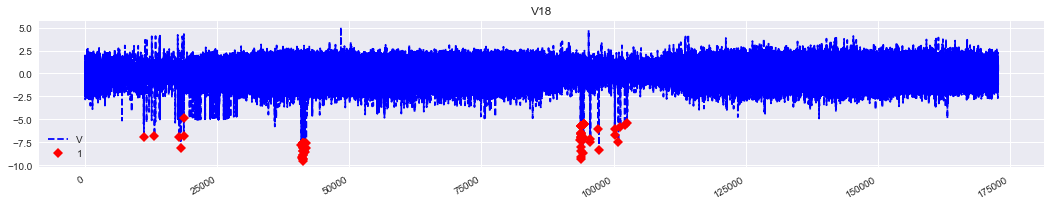

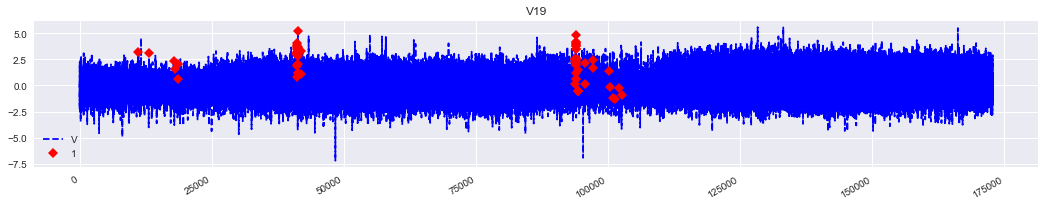

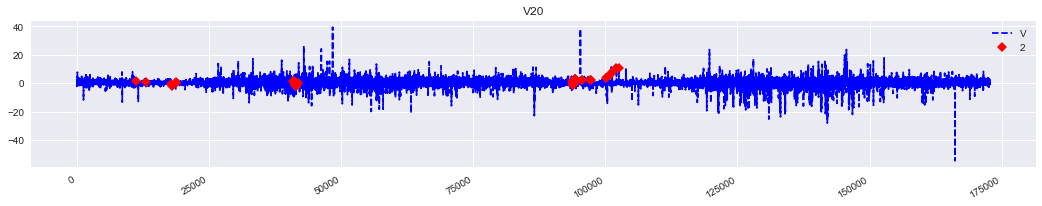

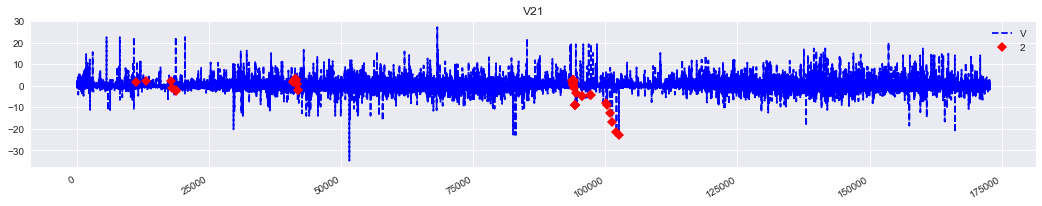

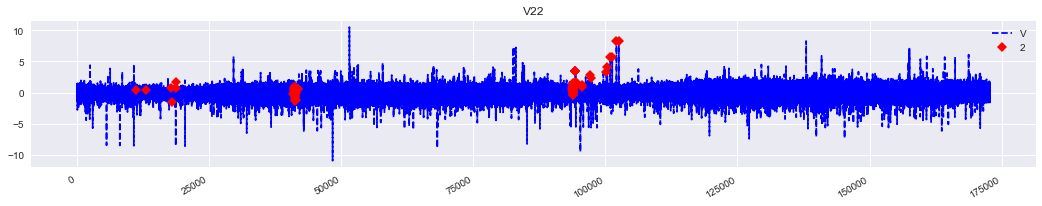

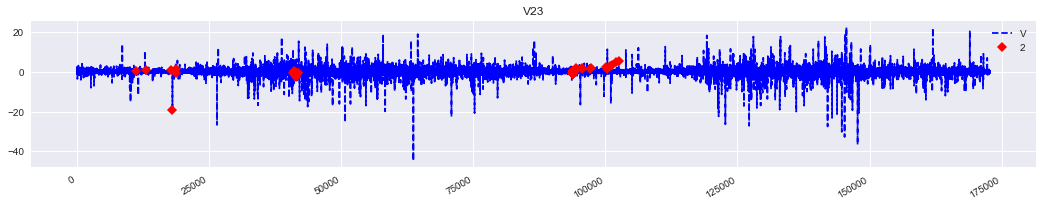

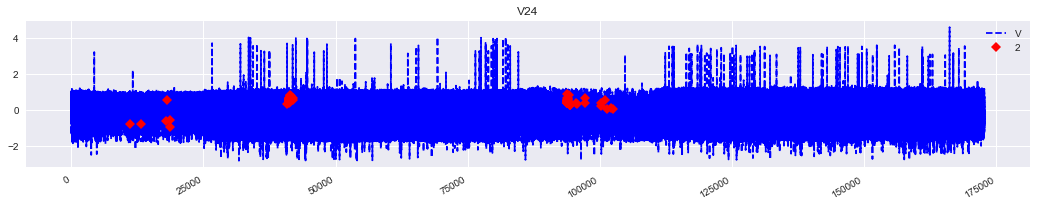

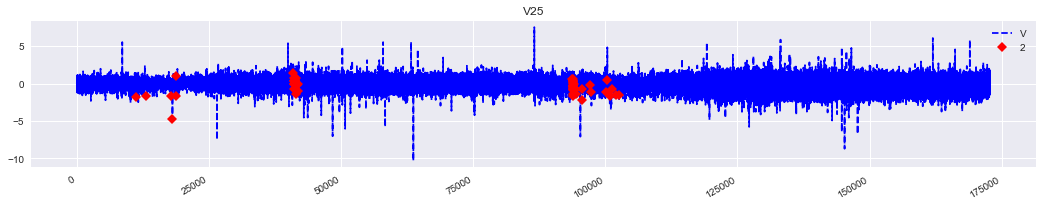

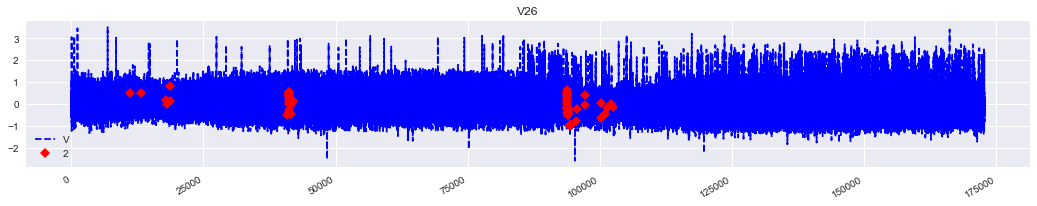

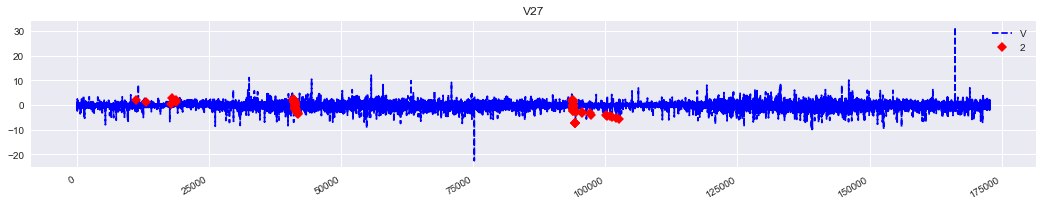

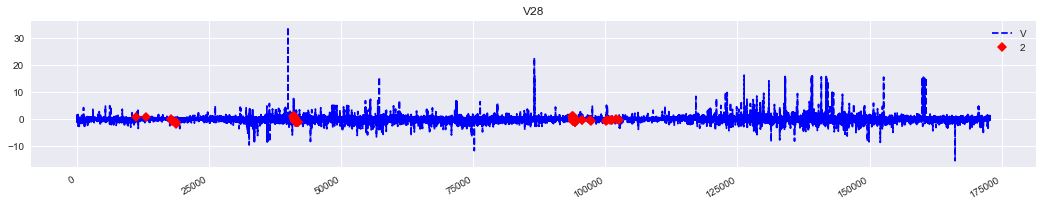

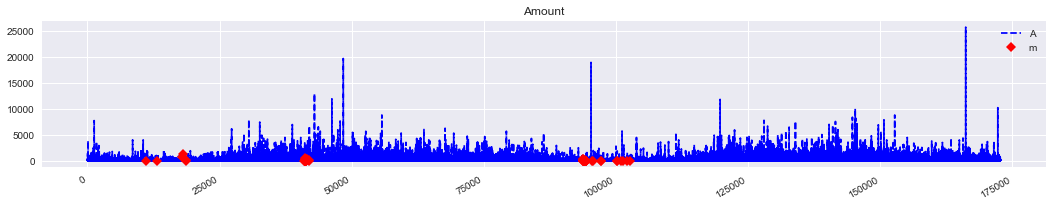

In [187]:
df_creditcard=df.drop(['Class'],axis=1)
columns=df_creditcard.columns
for col in columns:
    plt.style.use('seaborn')
    plt.figure(figsize=(18,3))
    plt.plot(df_creditcard[col], color='blue',linestyle='--', zorder=1)
    plt.plot(anom[col], linestyle='none', marker='D', color='red')
    plt.gcf().autofmt_xdate()
    plt.title(col)
    plt.legend(col)
    plt.show()
